In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("Iqjg5HHP24fJmis5hEJRZjvPh",
    "IrbM0sN99rnSgBbj4yr4R5ulv3hKAvCVZWKOvYSnpCR682h0Xm")
    auth.set_access_token("1569886796179456006-rSOrZns8iOoFVM1hyJOrAwomnEruqo",
    "Czcs7rrmZ97YPYRzFluPTmmlR7WdZ6pirDxCKr4hx2UzC")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


In [4]:
tweets = extractor.user_timeline(screen_name="Poconggg", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 194.

5 tweet teratas:

Ditantang #adubalap sama @m_marshel, kalau kalah gue harus follow akun dia. Kok bisa ya ada orang yang kepedean ban… https://t.co/QA6aCMgrkp

Baru tau sekarang mantau saham di https://t.co/mT324OMJ6B lebih gampang daripada ngurus tamagotchi. Satu layar udah… https://t.co/LBxJiil5vo

Shoutout to @sillysocietynft for creating this masterpiece mashup! 

Luucuuuuu beneeeerrrrr https://t.co/FaJQPHKdA1

Seru nih, 1.000 produk bareng JINISO! @Jinisoid 
Coba dipencet siapa tau beruntung👋🏼 
#JinisoEmangKeren… https://t.co/iiUkRRFtVn

-... . .-.. .. / ... .- .... .- -- / -.. .- -. / .-. . -.- ... .- / -.. .- -. .- / -.. .. @indopremier ..- -.. .- .… https://t.co/5cbpWZyxr0



In [5]:
# Kita dapat membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(10))

,Tweets
0,"Ditantang #adubalap sama @m_marshel, kalau kal..."
1,Baru tau sekarang mantau saham di https://t.co...
2,Shoutout to @sillysocietynft for creating this...
3,"Seru nih, 1.000 produk bareng JINISO! @Jinisoi..."
4,-... . .-.. .. / ... .- .... .- -- / -.. .- -....
5,"Info dong warga Twitter, Panti Asuhan anak sek..."
6,Mau bagi-bagi Golden Ticket juga ah ke warga T...
7,Pagi pertama setelah libur lebaran dimulai den...
8,RT @sillysocietynft: 🔥 WL GIVEAWAY 🔥\nwen fish...
9,Dipikir2 Ibu ini kasian memang. Suaminya menin...


In [6]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1571679002146009088
2022-09-19 01:54:09+00:00
Twitter for iPhone
222
11
None
None
{'hashtags': [{'text': 'adubalap', 'indices': [10, 19]}], 'symbols': [], 'user_mentions': [{'screen_name': 'm_marshel', 'name': 'Komedian Inisial M', 'id': 1224250279, 'id_str': '1224250279', 'indices': [25, 35]}], 'urls': [{'url': 'https://t.co/QA6aCMgrkp', 'expanded_url': 'https://twitter.com/i/web/status/1571679002146009088', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [8]:
dataset['len'] = np.array([len(tweet.text) for tweet in tweets])
dataset['ID']  = np.array([tweet.id for tweet in tweets])
dataset['Created'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets])
dataset['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
dataset.head()

,Tweets,len,ID,Created,Source,Likes,RTs
0,"Ditantang #adubalap sama @m_marshel, kalau kal...",140,1571679002146009088,2022-09-19 01:54:09+00:00,Twitter for iPhone,222,11
1,Baru tau sekarang mantau saham di https://t.co...,140,1556917248841101312,2022-08-09 08:16:12+00:00,Twitter for iPhone,193,9
2,Shoutout to @sillysocietynft for creating this...,115,1552263317087211520,2022-07-27 12:03:09+00:00,Twitter for iPhone,2393,238
3,"Seru nih, 1.000 produk bareng JINISO! @Jinisoi...",128,1546433665038942208,2022-07-11 09:58:11+00:00,Twitter for iPhone,202,13
4,-... . .-.. .. / ... .- .... .- -- / -.. .- -....,140,1543930260508778496,2022-07-04 12:10:33+00:00,Twitter for iPhone,603,45


In [10]:
# extract rata-rata:
media = np.mean(dataset['len'])

print("Jumlah rata-rata karakter di tweet: {}".format(media))

Jumlah rata-rata karakter di tweet: 94.37113402061856


In [11]:
# Kami mengekstrak tweet dengan FAV paling banyak dan dengan RT terbanyak:

fav_max = np.max(dataset['Likes'])
rt_max  = np.max(dataset['RTs'])

fav = dataset[dataset.Likes == fav_max].index[0]
rt  = dataset[dataset.RTs == rt_max].index[0]

# Max FAVs:
print("Tweet yang paling banyak disukai adalah: \n{}".format(dataset['Tweets'][fav]))
print("Jumlah suka: {}".format(fav_max))
print("{} Characters.\n".format(dataset['len'][fav]))

Tweet yang paling banyak disukai adalah: 
Mau bagi-bagi hampers Vespa di Twitter juga ah. Anak sini pada mau nggak?
Jumlah suka: 47077
73 Characters.



In [12]:
# Max RTs:
print("Tweet dengan retweet terbanyak adalah: \n{}".format(dataset['Tweets'][rt]))
print("Jumlah retweet: {}".format(rt_max))
print("{} Characters.\n".format(dataset['len'][rt]))

Tweet dengan retweet terbanyak adalah: 
RT @penguinmesir: semua akan kokoreaan pada waktunya https://t.co/jpZsGyS60Z
Jumlah retweet: 15363
76 Characters.



In [13]:
tlen = pd.Series(data=dataset['len'].values, index=dataset['Created'])
tfav = pd.Series(data=dataset['Likes'].values, index=dataset['Created'])
tret = pd.Series(data=dataset['RTs'].values, index=dataset['Created'])

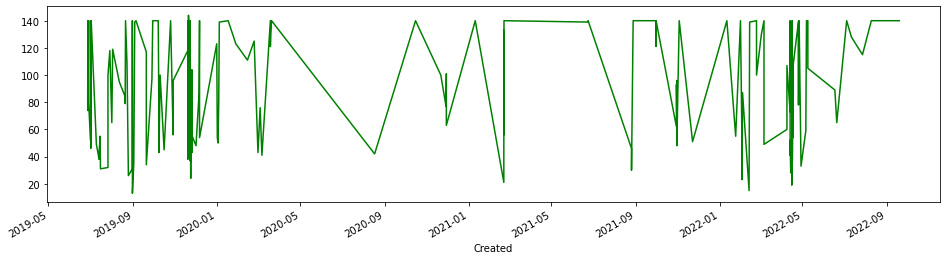

In [15]:
tlen.plot(figsize=(16,4), color='g');

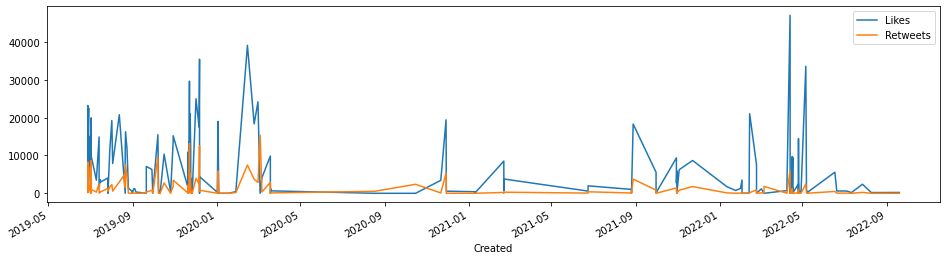

In [16]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [17]:
sources = []
for source in dataset['Source']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* Twitter for iPhone


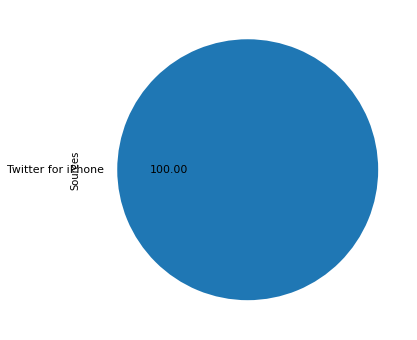

In [18]:
percent = np.zeros(len(sources))

for source in dataset['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [19]:
dataset.to_csv('dataset_user.csv',sep=';')